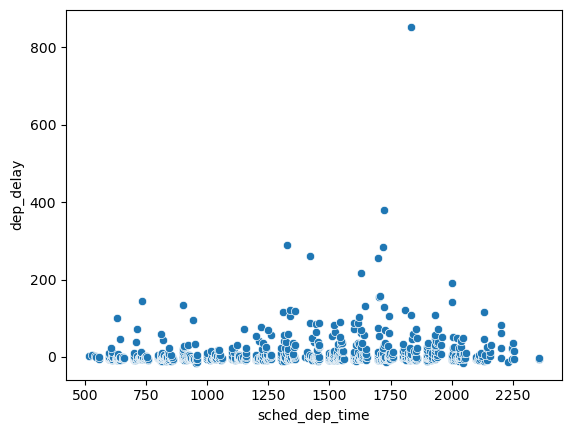

[1 1 3 4 5 6]


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have flights.csv in the current directory
flights = pd.read_csv("flights.csv")

# Parse double and numbers from strings
x = ["1.2", "5.6", "1e3"]
parsed_double = [float(i) for i in x]

x = ["$1,234", "USD 3,513", "59%"]
parsed_number = [float(''.join(filter(str.isdigit, i))) for i in x]

# Count by dest
dest_count = flights['dest'].value_counts()

# Summarize by dest
grouped = flights.groupby('dest').agg(n=('dest', 'size'), delay=('arr_delay', 'mean'))

# Number of distinct carriers by dest
carriers_count = flights.groupby('dest').agg(carriers=('carrier', 'nunique')).sort_values(by='carriers', ascending=False)

# Sum of distance by tailnum
distance_sum = flights.groupby('tailnum').agg(miles=('distance', 'sum'))

# Count by tailnum weighted by distance
distance_count = flights.groupby('tailnum').apply(lambda x: x['distance'].sum())

# Number of cancelled flights by dest
cancelled_count = flights.groupby('dest').apply(lambda x: x['dep_time'].isna().sum())

# Vector operations
x = np.array([1, 2, 10, 20])
res1 = x / 5
res2 = x / np.array([5, 5, 5, 5])
res3 = x * np.array([1, 2, 1, 2])[:len(x)]
# res4 = x * np.array([1, 2, 3]) # This will cause an error in Python since the arrays have different lengths
res4 = x * np.array([1, 2, 3])[np.arange(len(x)) % 3]

# Create df
df = pd.DataFrame({'x': [1, 5, 7], 'y': [3, 2, np.nan]})
df['min'] = df[['x', 'y']].min(axis=1)
df['max'] = df[['x', 'y']].max(axis=1)

# Integer division and modulo operations
res5 = np.arange(1, 11) // 3
res6 = np.arange(1, 11) % 3

# Mutate flights df
flights['hour'] = flights['sched_dep_time'] // 100
flights['minute'] = flights['sched_dep_time'] % 100

#plotted latter

# Round functions
round_2 = round(123.456, 2)
round_1 = round(123.456, 1)
round_10 = round(123.456, -1)
round_100 = round(123.456, -2)
rounded_array = np.round(np.array([1.5, 2.5]))

# Floor, ceiling, and other round operations
x_val = 123.456
floor_val = np.floor(x_val)
ceiling_val = np.ceil(x_val)
rounded_4 = round(x_val / 4) * 4
rounded_025 = round(x_val / 0.25) * 0.25

# Cut functions
bins1 = [0, 5, 10, 15, 20]
cut_res1 = pd.cut(x, bins1)
bins2 = [0, 5, 10, 100]
cut_res2 = pd.cut(x, bins2)
labels = ["sm", "md", "lg", "xl"]
cut_res3 = pd.cut(x, bins1, labels=labels)

y = np.array([np.nan, -10, 5, 10, 30])
cut_res_y = pd.cut(y, bins1)

# Cumulative sum
cumulative_sum = np.cumsum(np.arange(1, 11))

# Plot
sns.scatterplot(data=flights[(flights['month'] == 1) & (flights['day'] == 1)], x='sched_dep_time', y='dep_delay')
plt.show()

x = np.array([1, 2, 2, 3, 4, np.nan])

# Compute the rank
x_sorted = x.argsort(kind='mergesort')  # Use mergesort to ensure stable sort
x_rank = np.empty_like(x_sorted)
x_rank[x_sorted] = np.arange(len(x)) + 1

# Handle ties by averaging ranks of tied groups
unique, counts = np.unique(x[x_sorted], return_counts=True)
for count in counts:
    if count > 1:
        first = np.where(x_rank == np.where(x_sorted == np.where(x == unique[0])[0][0])[0][0] + 1)[0][0]
        x_rank[first:first + count] = np.full(count, np.mean(x_rank[first:first + count]))

print(x_rank)


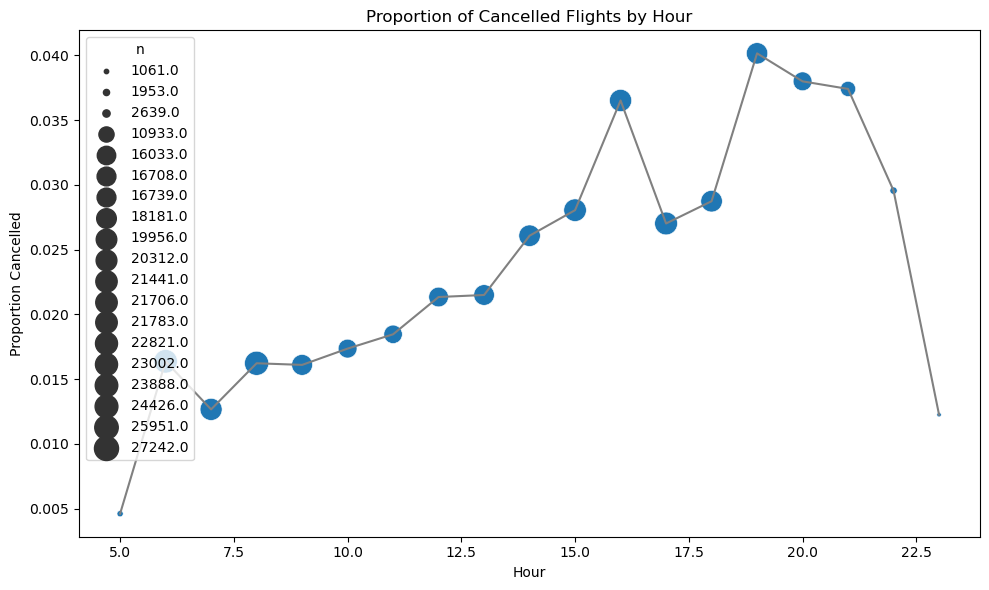

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
flights = pd.read_csv("flights.csv")

# Extract the hour from the sched_dep_time column
flights['hour'] = flights['sched_dep_time'] // 100

# Group by hour and compute the proportion of cancelled flights and the count of flights
grouped = flights.groupby('hour').apply(
    lambda group: pd.Series({
        'prop_cancelled': group['dep_time'].isna().mean(),
        'n': len(group)
    })
).reset_index()

# Filter out hours <= 1
grouped = grouped[grouped['hour'] > 1]

# Plot the results using seaborn and matplotlib
plt.figure(figsize=(10, 6))

# Use the plot function of matplotlib to create the line plot with a grey color
plt.plot(grouped['hour'], grouped['prop_cancelled'], color='#808080')  # RGB for grey

# Use seaborn to create the scatter plot
sns.scatterplot(data=grouped, x='hour', y='prop_cancelled', size='n', legend='full', sizes=(10, 300))

plt.xlabel("Hour")
plt.ylabel("Proportion Cancelled")
plt.title("Proportion of Cancelled Flights by Hour")
plt.tight_layout()
plt.show()


In [11]:
x = np.array([1, 2, 2, 3, 4, np.nan])
df = pd.DataFrame({'x': x})

df['row_number'] = df['x'].rank(method='first').fillna(0)
df['dense_rank'] = df['x'].rank(method='dense').fillna(0)
df['percent_rank'] = df['x'].rank(pct=True).fillna(0)
df['cume_dist'] = df['x'].rank(method='min').fillna(0) / len(df['x'])
print(df)


     x  row_number  dense_rank  percent_rank  cume_dist
0  1.0         1.0         1.0           0.2   0.166667
1  2.0         2.0         2.0           0.5   0.333333
2  2.0         3.0         2.0           0.5   0.333333
3  3.0         4.0         3.0           0.8   0.666667
4  4.0         5.0         4.0           1.0   0.833333
5  NaN         0.0         0.0           0.0   0.000000


In [12]:
df = pd.DataFrame({'id': np.arange(1, 11)})
df['row0'] = df.index
df['three_groups'] = df['row0'] % 3
df['three_in_each_group'] = df['row0'] // 3
print(df)


   id  row0  three_groups  three_in_each_group
0   1     0             0                    0
1   2     1             1                    0
2   3     2             2                    0
3   4     3             0                    1
4   5     4             1                    1
5   6     5             2                    1
6   7     6             0                    2
7   8     7             1                    2
8   9     8             2                    2
9  10     9             0                    3


In [13]:
df = pd.DataFrame({'id': np.arange(1, 11)})
df['row0'] = df.index
df['three_groups'] = df['row0'] % 3
df['three_in_each_group'] = df['row0'] // 3
print(df)


   id  row0  three_groups  three_in_each_group
0   1     0             0                    0
1   2     1             1                    0
2   3     2             2                    0
3   4     3             0                    1
4   5     4             1                    1
5   6     5             2                    1
6   7     6             0                    2
7   8     7             1                    2
8   9     8             2                    2
9  10     9             0                    3


In [14]:
x = np.array([2, 5, 11, 11, 19, 35])
df = pd.DataFrame({'x': x})
df['lag'] = df['x'].shift(1)
df['lead'] = df['x'].shift(-1)
df['x_minus_lag'] = df['x'] - df['lag']
df['equal_to_lag'] = df['x'] == df['lag']
print(df)


    x   lag  lead  x_minus_lag  equal_to_lag
0   2   NaN   5.0          NaN         False
1   5   2.0  11.0          3.0         False
2  11   5.0  11.0          6.0         False
3  11  11.0  19.0          0.0          True
4  19  11.0  35.0          8.0         False
5  35  19.0   NaN         16.0         False


In [15]:
times = [0, 1, 2, 3, 5, 10, 12, 15, 17, 19, 20, 27, 28, 30]
events = pd.DataFrame({'time': times})
events['diff'] = events['time'].diff().fillna(events['time'].iloc[0])
events['has_gap'] = events['diff'] >= 5
events['group'] = events['has_gap'].cumsum()
print(events)


    time  diff  has_gap  group
0      0   0.0    False      0
1      1   1.0    False      0
2      2   1.0    False      0
3      3   1.0    False      0
4      5   2.0    False      0
5     10   5.0     True      1
6     12   2.0    False      1
7     15   3.0    False      1
8     17   2.0    False      1
9     19   2.0    False      1
10    20   1.0    False      1
11    27   7.0     True      2
12    28   1.0    False      2
13    30   2.0    False      2


In [16]:
df = pd.DataFrame({'x': ["a", "a", "a", "b", "c", "c", "d", "e", "a", "a", "b", "b"],
                   'y': [1, 2, 3, 2, 4, 1, 3, 9, 4, 8, 10, 199]})
df['id'] = (df['x'] != df['x'].shift()).cumsum()
result = df.groupby('id').first()
print(result)


    x   y
id       
1   a   1
2   b   2
3   c   4
4   d   3
5   e   9
6   a   4
7   b  10


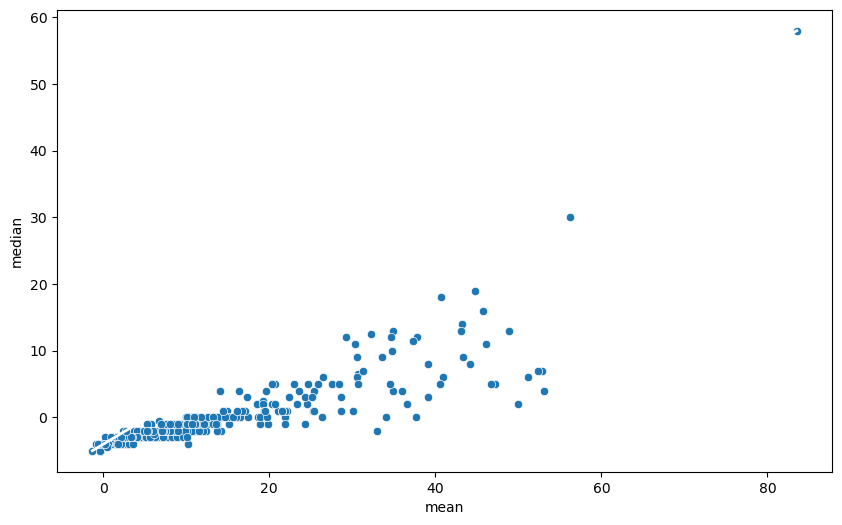

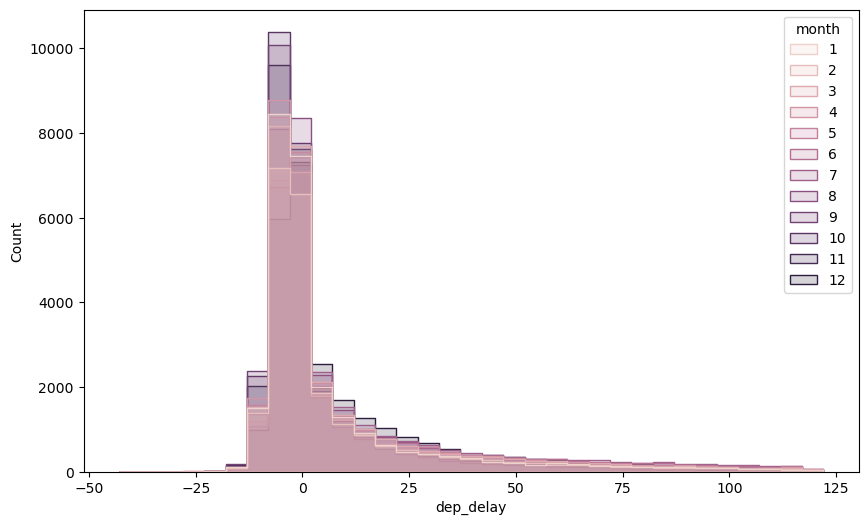

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Group by year, month, day, hour and filter
flights['hour'] = (flights['dep_time'] // 100).fillna(0).astype(int)
grouped = flights.groupby(['year', 'month', 'day', 'hour']).agg({
    'dep_delay': 'mean',
    'origin': 'size'   # Use another column (e.g., 'origin') to get the count
}).reset_index().rename(columns={'origin': 'n'})
grouped = grouped[grouped['n'] > 5]

# 2. Group by year, month, day and plot
grouped2 = flights.groupby(['year', 'month', 'day']).agg({
    'dep_delay': ['mean', 'median', 'count']
}).reset_index()
grouped2.columns = ['year', 'month', 'day', 'mean', 'median', 'n']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=grouped2, x='mean', y='median')
plt.plot([grouped2['mean'].min(), grouped2['mean'].max()], 
         [grouped2['median'].min(), grouped2['median'].max()], 
         color='white', linewidth=2)
plt.show()

# 3. Group by year, month, day and get max and 95th quantile
grouped3 = flights.groupby(['year', 'month', 'day']).agg({
    'dep_delay': ['max', lambda x: x.quantile(0.95)]
}).reset_index()
grouped3.columns = ['year', 'month', 'day', 'max', 'q95']

# 4. Group by origin, dest and get IQR
# grouped4 = flights.groupby(['origin', 'dest']).agg({
#     'distance': lambda x: x.quantile(0.75) - x.quantile(0.25),
#     'origin': 'size'
# }).reset_index().rename(columns={'origin': 'n'})
grouped4 = flights.groupby(['origin', 'dest']).agg({
    'distance': lambda x: x.quantile(0.75) - x.quantile(0.25),
    'year': 'size'   # Use another column (e.g., 'year') to get the count
}).reset_index().rename(columns={'year': 'n'})
grouped4 = grouped4[grouped4['distance'] > 0]

# 5. Filter and plot histogram
filtered_flights = flights[flights['dep_delay'] < 120]
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_flights, x='dep_delay', hue='month', element='step', binwidth=5, alpha=0.2)
plt.show()

# 6. Group by year, month, day and get first, fifth, and last departure
grouped5 = flights.groupby(['year', 'month', 'day']).agg({
    'dep_time': ['first', lambda x: x.nsmallest(5).iloc[-1] if len(x) > 4 else np.nan, 'last']
}).reset_index()
grouped5.columns = ['year', 'month', 'day', 'first_dep', 'fifth_dep', 'last_dep']

# 7. Group by year, month, day and filter by rank
flights['rank'] = flights.groupby(['year', 'month', 'day'])['sched_dep_time'].rank().astype(int)
max_rank = flights.groupby(['year', 'month', 'day'])['rank'].transform('max')
flights_filtered_by_rank = flights[(flights['rank'] == 1) | (flights['rank'] == max_rank)]


In [18]:
import numpy as np

x = np.array([1, 2, 2, 3, 4, np.nan])

# x / sum(x)
result1 = x / np.nansum(x)
print(result1)

# (x - mean(x)) / sd(x)
result2 = (x - np.nanmean(x)) / np.nanstd(x)
print(result2)

# (x - min(x)) / (max(x) - min(x))
result3 = (x - np.nanmin(x)) / (np.nanmax(x) - np.nanmin(x))
print(result3)

# x / first(x)
result4 = x / x[0]
print(result4)


[0.08333333 0.16666667 0.16666667 0.25       0.33333333        nan]
[-1.37281295 -0.39223227 -0.39223227  0.58834841  1.56892908         nan]
[0.         0.33333333 0.33333333 0.66666667 1.                nan]
[ 1.  2.  2.  3.  4. nan]
